In [10]:
from glob import glob
from os import chdir
from os.path import basename

import pandas as pd
import numpy as np
from scipy.stats import fisher_exact
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc
from pqdm.processes import pqdm

chdir('/home/vladimirnoz/ibis')
g2a = set(pd.read_table('finals.tsv').query('`Primary Discipline` == "G2A"')['Transcription factor'])
HITS_THR = 10

In [73]:
g2a

{'CAMTA1',
 'LEUTX',
 'MYF6',
 'PRDM13',
 'SALL3',
 'USF3',
 'ZBED2',
 'ZBED5',
 'ZNF20',
 'ZNF251',
 'ZNF367',
 'ZNF395',
 'ZNF493',
 'ZNF518B',
 'ZNF648'}

In [11]:
def rename_teams(team):
    team_rename_map = {
        'BenchPressers': 'Bench Pressers',
        'BiologyImpostor': 'Biology Impostor',
        'ChatGPT': 'ChatGPTusers',
        'chiCkeNpoxgaNg': 'chiCkeN pox gaNg',
        'NaturalKiller': 'Natural Killer',
        'PostBioinformaticDisorder': 'Post Bioinformatic Disorder',
        'SalimovAndFrolovLaboratory': 'Salimov and Frolov Laboratory',
        'sbitwo': 'sbi two',
        'TheMotifvators': 'The Motifvators',
    }
    if team in team_rename_map:
        return team_rename_map[team]
    return team

In [12]:
file_path_list = glob('curves_plots/curves/*.tsv')
file_path_list

['curves_plots/curves/MYF6@sbitwo@PWM@G2A@MYF6motif0.tsv',
 'curves_plots/curves/GCM1@mex@PWM@A2G@PBM1434_f1.tsv',
 'curves_plots/curves/MYF6@mj@AAA@G2A@AAA.tsv',
 'curves_plots/curves/GCM1@mex@PWM@A2G@PBM1434_f4.tsv',
 'curves_plots/curves/MYF6@RSAT@PWM@G2A@MYF6_C_p7_m2.tsv',
 'curves_plots/curves/GCM1@mex@PWM@A2G@PBM1434_f3.tsv',
 'curves_plots/curves/MYF6@sbitwo@PWM@G2A@MYF6motif3.tsv',
 'curves_plots/curves/GCM1@sbitwo@PWM@A2G@GCM1motif1.tsv',
 'curves_plots/curves/GCM1@BiologyImpostor@PWM@A2G@rap5.tsv',
 'curves_plots/curves/GCM1@mex@PWM@A2G@PBM1434_f2.tsv',
 'curves_plots/curves/GCM1@Biology.Impostor@AAA@A2G@AAA.tsv',
 'curves_plots/curves/MYF6@sbitwo@PWM@G2A@MYF6motif1.tsv',
 'curves_plots/curves/MYF6@RSAT@PWM@G2A@MYF6_G_c1_n6_3m.tsv',
 'curves_plots/curves/MYF6@RSAT@PWM@G2A@MYF6_C_p6_m2_G19_M1_C7.tsv',
 'curves_plots/curves/MYF6@Medici@AAA@G2A@AAA.tsv',
 'curves_plots/curves/GCM1@Salimov.and.Frolov.Laboratory@AAA@A2G@AAA.tsv',
 'curves_plots/curves/GCM1@sbitwo@PWM@A2G@GCM1motif

In [70]:
tables = []
for file_path in file_path_list:
    info = basename(file_path).replace('.tsv', '').split('@')
    df = pd.read_table(file_path)
    df['tf, team, model_type, discipline, submission'.split(', ')] = info
    #df['team'] = rename_teams(info[1]).replace('.', ' ')
    if 'thr' in df.columns:
        df['threshold'] = df['thr']
    else:
        df['thr'] = df['threshold']
    tables.append(df)
df = pd.concat(tables)

/tmp/ipykernel_1053952/123651278.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(tables)


In [72]:
df['team'].unique()

array(['sbitwo', 'mex', 'mj', 'RSAT', 'BiologyImpostor',
       'Biology.Impostor', 'Medici'], dtype=object)

In [42]:
order = ['tf', 'team', 'model_type', 'discipline']
teams = sorted(list(set(df[order].itertuples(index=False, name=None))))

In [53]:
teams

[('GCM1', 'Biology Impostor', 'AAA', 'A2G'),
 ('GCM1', 'Biology Impostor', 'PWM', 'A2G'),
 ('GCM1', 'mex', 'PWM', 'A2G'),
 ('GCM1', 'sbi two', 'PWM', 'A2G'),
 ('MYF6', 'Medici', 'AAA', 'G2A'),
 ('MYF6', 'RSAT', 'PWM', 'G2A'),
 ('MYF6', 'mj', 'AAA', 'G2A'),
 ('MYF6', 'sbi two', 'PWM', 'G2A')]

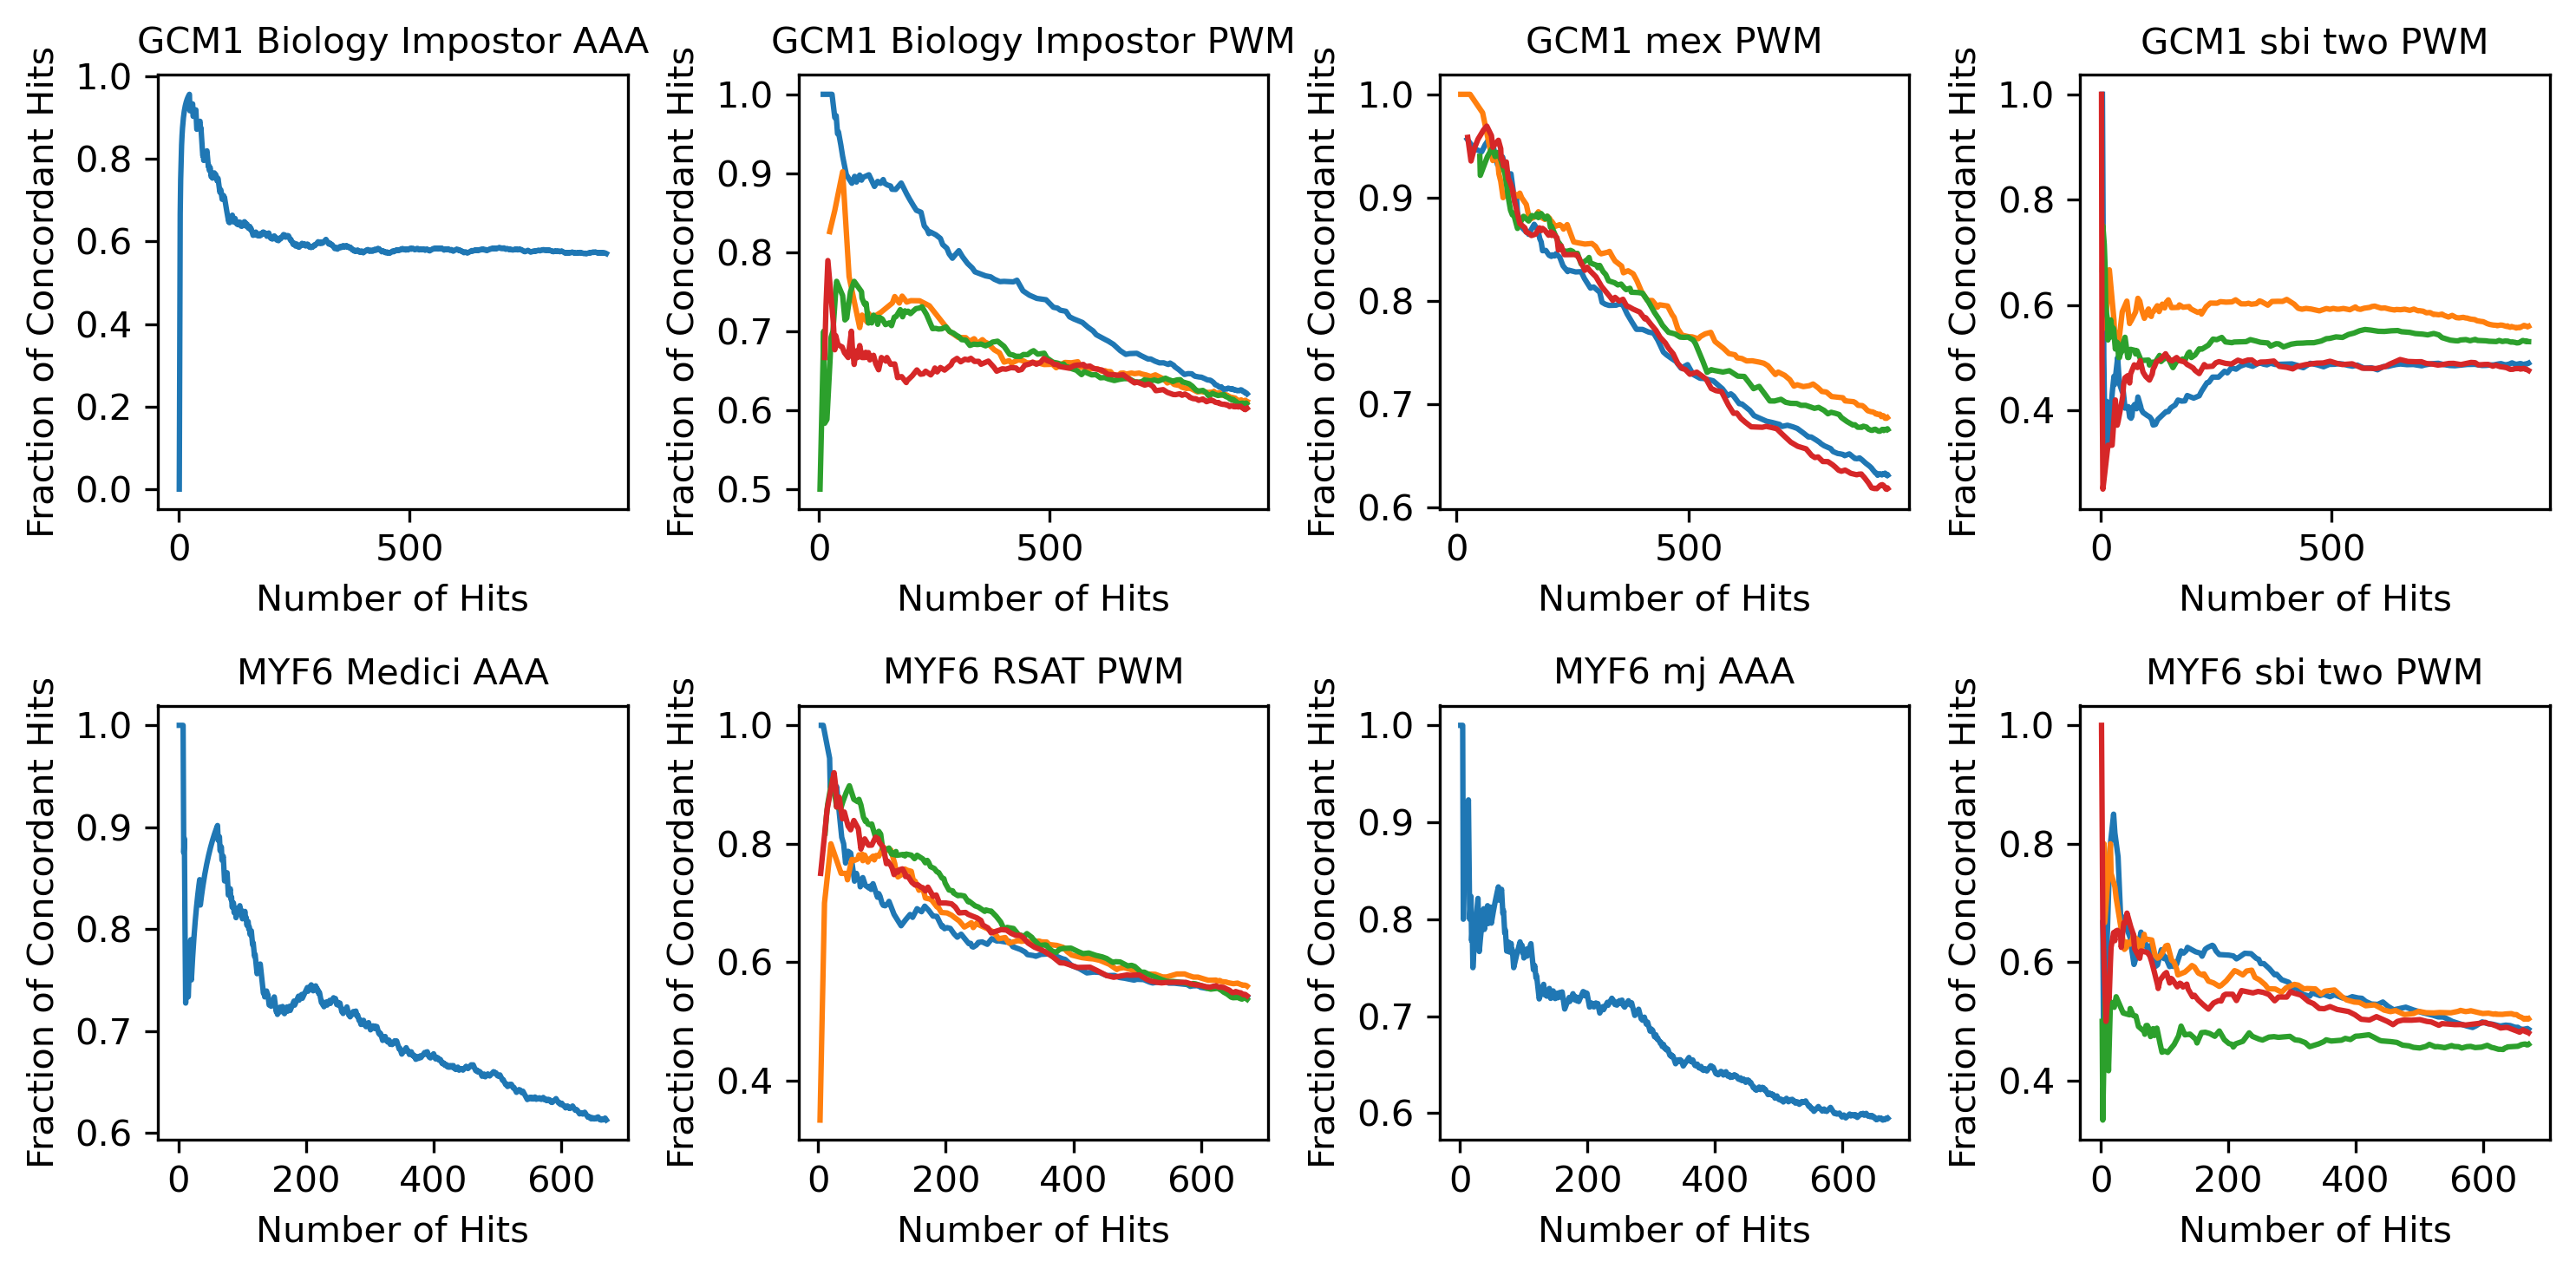

In [67]:


    

fig, axs = plt.subplots(2, 4, dpi=300, figsize=(10, 5))

for i, info in enumerate(teams):
    col = i % 4
    row = i // 4
    ax = axs[row][col]

    ax.set_title(' '.join(info[:-1]), fontsize=10)
    
    mask = True
    for col, value in zip(order, info):
        mask = (df[col] == value) * mask
    data = df[mask]

    
    
    sns.lineplot(data=data, x='hits', y='conc_ratio', hue='submission', ax=ax)
    ax.set_xlabel('Number of Hits')
    ax.set_ylabel('Fraction of Concordant Hits')
    ax.get_legend().remove()
fig.tight_layout()